In [1]:
import pandas as pd
from pandas.core.dtypes.common import is_numeric_dtype
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('game data.csv')
df

,Days,Outlook,Temprature,Routine,Wear Jacket?
0,1,Sunny,Cold,Indoor,No
1,2,Cloudy,Cold,Indoor,Yes
2,3,Cloudy,Warm,Outdoor,No
3,4,Sunny,Cold,Outdoor,Yes
4,5,Cloudy,Cold,Outdoor,Yes
5,6,Sunny,Warm,Outdoor,No
6,7,Cloudy,Warm,Indoor,No
7,8,Sunny,Warm,Indoor,No


In [3]:
df.drop('Days', axis=1, inplace=True)

In [4]:
df

,Outlook,Temprature,Routine,Wear Jacket?
0,Sunny,Cold,Indoor,No
1,Cloudy,Cold,Indoor,Yes
2,Cloudy,Warm,Outdoor,No
3,Sunny,Cold,Outdoor,Yes
4,Cloudy,Cold,Outdoor,Yes
5,Sunny,Warm,Outdoor,No
6,Cloudy,Warm,Indoor,No
7,Sunny,Warm,Indoor,No


In [5]:
x = df.drop('Wear Jacket?', axis=1)
x

,Outlook,Temprature,Routine
0,Sunny,Cold,Indoor
1,Cloudy,Cold,Indoor
2,Cloudy,Warm,Outdoor
3,Sunny,Cold,Outdoor
4,Cloudy,Cold,Outdoor
5,Sunny,Warm,Outdoor
6,Cloudy,Warm,Indoor
7,Sunny,Warm,Indoor


In [6]:
y=df['Wear Jacket?']
y

0     No
1    Yes
2     No
3    Yes
4    Yes
5     No
6     No
7     No
Name: Wear Jacket?, dtype: object

# Decision Tree Algorithm

In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [8]:
for col in x.columns:
    if is_numeric_dtype(x[col]):
        continue
    else:
        x[col]=LabelEncoder().fit_transform(x[col])

In [9]:
x

,Outlook,Temprature,Routine
0,1,0,0
1,0,0,0
2,0,1,1
3,1,0,1
4,0,0,1
5,1,1,1
6,0,1,0
7,1,1,0


In [10]:
#Outlook (sunny> 1; cloudy> 0)
#Temparature (cold> 0; warm> 1)
#Routine(indoor> 0 ; Outdoor> 1)
#Sunny ,cold, indoor=(1,0,0) = ??

In [11]:
clf = DecisionTreeClassifier()

In [12]:
clf.fit(x,y)

DecisionTreeClassifier()

In [13]:
clf.predict([[1,0,0]])

C:\Users\MD.NAIM HOSSAIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['No'], dtype=object)

[Text(0.6, 0.875, 'x[1] <= 0.5\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.4, 0.625, 'x[0] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.2, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6, 0.375, 'x[2] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.4, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.625, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]')]

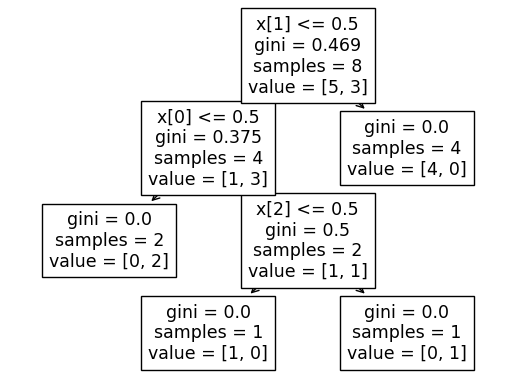

In [14]:
tree.plot_tree(clf)

[Text(0.6, 0.875, 'Temprature <= 0.5\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.4, 0.625, 'Outlook <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.2, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6, 0.375, 'Routine <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.4, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.625, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]')]

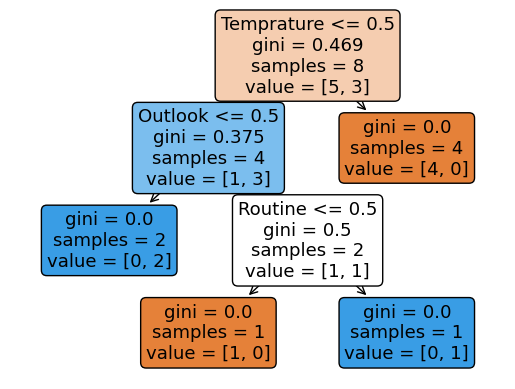

In [15]:
tree.plot_tree(clf,rounded = True, filled=True, feature_names=x.columns)

[Text(0.6, 0.875, 'Temprature <= 0.5\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.4, 0.625, 'Outlook <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.2, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6, 0.375, 'Routine <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.4, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.625, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]')]

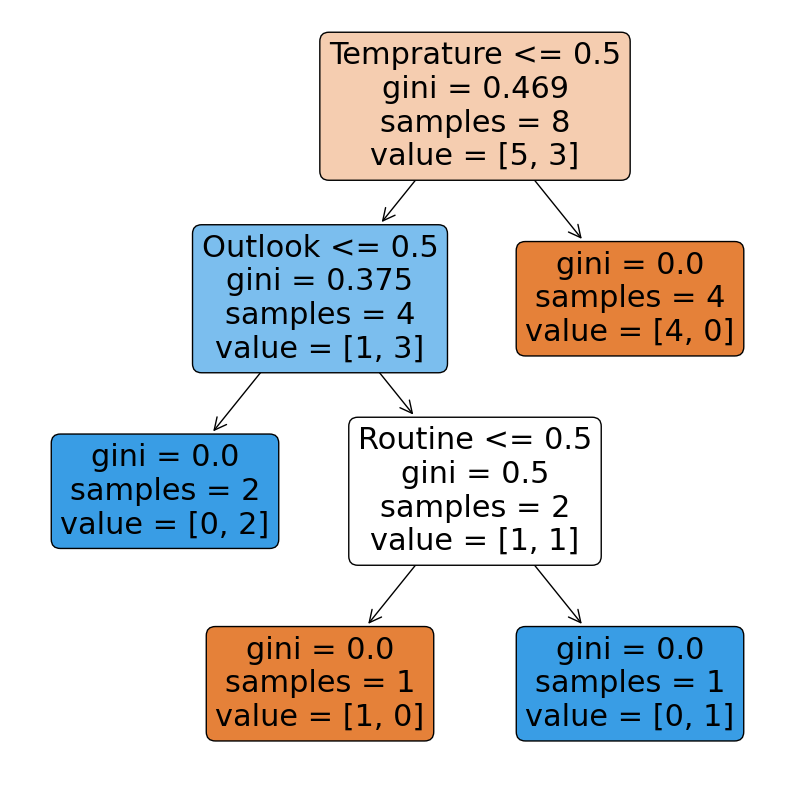

In [16]:
plt.figure(figsize=(10,10))
tree.plot_tree(clf,rounded = True, filled=True, feature_names=x.columns)

In [17]:
text_rep = tree.export_text(clf)
text_rep

'|--- feature_1 <= 0.50\n|   |--- feature_0 <= 0.50\n|   |   |--- class: Yes\n|   |--- feature_0 >  0.50\n|   |   |--- feature_2 <= 0.50\n|   |   |   |--- class: No\n|   |   |--- feature_2 >  0.50\n|   |   |   |--- class: Yes\n|--- feature_1 >  0.50\n|   |--- class: No\n'

In [18]:
print(text_rep)

|--- feature_1 <= 0.50
|   |--- feature_0 <= 0.50
|   |   |--- class: Yes
|   |--- feature_0 >  0.50
|   |   |--- feature_2 <= 0.50
|   |   |   |--- class: No
|   |   |--- feature_2 >  0.50
|   |   |   |--- class: Yes
|--- feature_1 >  0.50
|   |--- class: No

